/afs/crc.nd.edu/user/m/mislam5/miniconda3/envs/floability-env-2/lib/python3.13/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector
/afs/crc.nd.edu/user/m/mislam5/miniconda3/envs/floability-env-2/lib/python3.13/site-packages/coffea/nanoevents/schemas/nanoaod.py:264: RuntimeWarning: Missing cross-reference index for Electron_photonIdx => Photon
  warnings.warn(
/afs/crc.nd.edu/user/m/mis

Output()

{'from-uproot-d8a465452d1c096d8062d5c4894b589b': frozenset({'MET_pt'})}

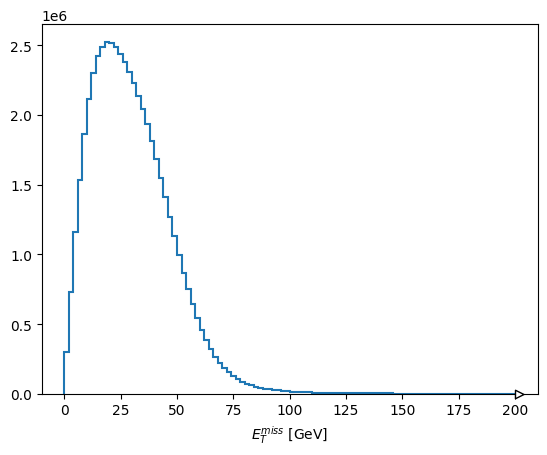

In [1]:
from coffea.nanoevents import NanoEventsFactory
from coffea import processor

import dask_awkward as dak
import hist.dask as hda


use_taskvine = True

if use_taskvine:
    from ndcctools.taskvine import DaskVine

    
    vine_manager = DaskVine(name="saiful-coffea-example")

    executor_args = {
        "scheduler": vine_manager,
        "worker_transfers": True,
        "task_mode": "function-calls",
    }
else:
    from distributed import Client
    client = Client()

    executor_args = {}


data_file = ("file:///scratch365/btovar/data//Run2012B_SingleMu.root",)

events = NanoEventsFactory.from_root(
    {data_file: "/Events"}, metadata={"dataset": "SingleMu"}
).events()

q1_hist = (
    hda.Hist.new.Reg(100, 0, 200, name="met", label="$E_{T}^{miss}$ [GeV]")
    .Double()
    .fill(events.MET.pt)
)

q1_hist.compute(**executor_args).plot1d()

dak.necessary_columns(q1_hist)